Title: pymc-learn Date: 2019-08-02 16:05 Tags: python Slug: blog-4

pymc-learn is a package that brings bayesian models with a scikit-learn style implementation. Let's jump right into the code and explain it along the way. Our imports are fairly straightforward, leaning on sklearn to help us spoof up some data and matplotlib to show it.

In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from pmlearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

You will notice pymc-learn even mimics sklearn in its import syntax above. Below we are spinning up a regression to model on top of.

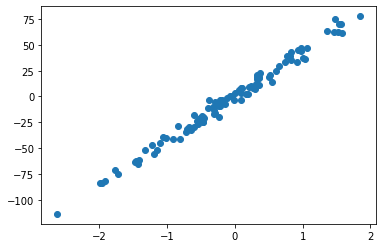

In [2]:
X, y = make_regression(n_samples=100, n_features=1, noise=5, random_state=42)
plt.scatter(X,y)
plt.show()

Next we train_test_split so we know it's real.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Now we bring in our model. You will notice this is exactly the same as bringing in a linear regression from sklearn, but in this case it will be running a pymc33 bayesian regression. 

In [4]:
model = LinearRegression()

Fitting the model has one extra argument, where I am specifying the nuts sampler instead of their default of advi. This is just my preference and changes the way the model works through the data. Those of you with bayesian experience will have several questions at this point, but the top of that list is likely "where is the prior?". The unsophisticated answer is that this is being done by a default and arbitrarily weak prior. The more complex answer will come in my wrap up at the end. 

In [5]:
model.fit(X_train, y_train, inference_type='nuts')

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, betas, alpha]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:01<00:00, 5256.57draws/s]


LinearRegression()

Thats it. Bayesian regression on top of our data in three lines of model code. The beauty of pymc-learn is its simplicity and speed. From here I really like what their documentation points toward for visualizing and interrogating the model. Because pymc-learn is built on PYMC3 we can lean on pymc3 for its built in analysis and plotting methods.

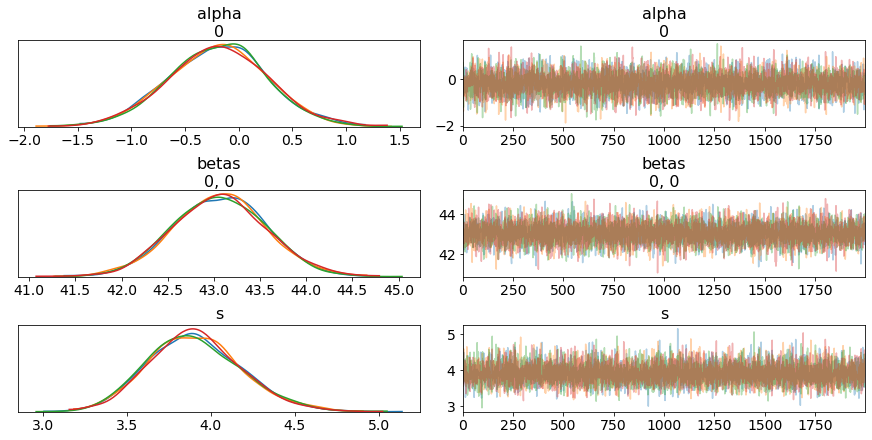

In [6]:
import pymc3 as pm
pm.traceplot(model.trace);

It offers an easy predict function which opens up lots of further interrogation of how your model is performing.

In [7]:
y_hat = model.predict(X_test)

100%|██████████| 2000/2000 [00:14<00:00, 136.57it/s]


In [8]:
y_hat

array([-57.46821855,  63.60815911,  34.71740987, -17.13392939,
       -10.2778116 , -12.84784122, -19.99844677, -76.30357722,
        35.28897221,  39.96687835,  44.14586611,  15.18260273,
       -52.64242061, -23.05287657, -49.78629863, -20.68440727,
        41.76269556,  10.14676882,  31.54535075,  16.0145292 ,
        14.68854031, -43.88412358, -25.99598553,  65.39097055,
        32.77241119])

As well it has a built in score function.

In [9]:
model.score(X_test, y_test)

100%|██████████| 2000/2000 [00:13<00:00, 147.42it/s]


0.9815642062382248

Finally let's plot our test data with our model's predicted regression.

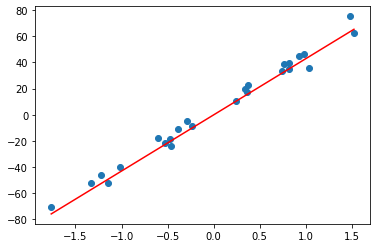

In [10]:
max_x = max(X_test)
min_x = min(X_test)

slope_learned = model.summary['mean']['betas__0_0']
intercept_learned = model.summary['mean']['alpha__0']
fig1, ax1 = plt.subplots()
ax1.scatter(X_test, y_test)
ax1.plot([min_x, max_x], [slope_learned*min_x + intercept_learned, slope_learned*max_x + intercept_learned], 'r');

pymc-learn is direct and to the point. But the greater question is its purpose. Where does it fit within your tools as a data scientist. In my opinion there are two cases it shines in.<br/><br/>
The first is if you're looking back at an established pipeline and want to easily slot in some bayesian stats. A few lines and you'll be seeing how it performs right there within your already established work.<br/><br/>
The second is if you need an easy way to introduce someone to bayesian modelling, and specifically if you don't have the time to teach them pymc3 and they aren't a self starter with the documentation.<br/><br/>
Now these inadvertently highlight the areas I don't love about pymc-learn. Earlier I noted that this is playing a very weak prior on your data. There are provisions to have a prior added within pymc-learn, but it begins to balloon out the code and complexity. The novelty of this package is its simplicity, and as soon as you get into adding priors I believe you are better off learning and using pymc3. The barrier that pymc3 is to new data scientists is as much a bayesian knowledge problem as it is an api problem. As the user becomes more and more comfortable with bayesian ideas the pymc3 api becomes more and more intuitive, and whereas more experience with pymc3 will build bayesian knowledge, it appears that PYMC-Learn keeps the bayes work too obscured for the developer to gain valuable experience.<br/><br/>
My final issue is with the syntax of pymc-learn. It mirrors sklearn so closely that you could easily switch and entire pipeline to a bayesian model with a two character change in the imports, from sklearn to pmlearn. Although this may be the pinnacle of convenience, I think that it makes for unnecessary obscurity. Python is so good at being clear at what it is doing, and by mimicking sklearn so closely it hides itself in a way that would be difficult for anyone unfamiliar with the package to pick up on.<br/><br/>
In the end I will end up using pymc-learn within my work, but mostly in an exploratory fashion. Any heavy bayesian lifting will go straight to pymc3.